# Mecab

In [3]:
from konlpy.tag import Mecab
mecab = Mecab()

Exception: Install MeCab in order to use it: http://konlpy.org/en/latest/install/

In [2]:
pip install konlpy

  Found existing installation: beautifulsoup4 4.7.1
    Uninstalling beautifulsoup4-4.7.1:
      Successfully uninstalled beautifulsoup4-4.7.1
Note: you may need to restart the kernel to use updated packages.


**1.option 및 import**

In [1]:
# 경고 메시지 무시
import warnings
 
warnings.filterwarnings("ignore")

In [27]:
import pandas as pd

# 데이터 로드
raw = pd.read_excel('data/기생충_MovieReview_v1.xlsx')

raw.head(3)

,date,user,comment,score,likes,dislikes
0,2019-05-30 15:58:00,brilliant_AKA_밝음(bril****),"비에 젖지 않는 고급 장난감 텐트와, 비에 젖다 못해 잠겨버리는 반지하 가구",10,28292,1485
1,2019-05-30 12:25:00,김희정(priv****),최근 본 영화중 가장 충격적이었음... 근데 보니까 15세말고 19세 걸어야될것같던데..,10,18490,1560
2,2019-05-30 14:41:00,리오(papi****),"지하철이라는 단어가 언급되는 순간, 대다수의 관객은 자신이 어디에 이입할 지를 안다.",10,17140,1099


In [28]:
print(raw['keyword'].value_counts())

KeyError: 'keyword'

In [ ]:
# 데이터 셋 선택
df = raw.loc[raw['keyword']=='UMF 데미소다'].reset_index(drop = True)

#데이터 확인
print(df["content"].head())
print(df['keyword'].value_counts())

In [43]:
data = raw["comment"].dropna().reset_index(drop=True)
data

0                비에 젖지 않는 고급 장난감 텐트와 비에 젖다 못해 잠겨버리는 반지하 가구
1                 최근 본 영화중 가장 충격적이었음 근데 보니까 세말고 세 걸어야될것같던데
2            지하철이라는 단어가 언급되는 순간 대다수의 관객은 자신이 어디에 이입할 지를 안다
3                전 가정부가 집 벨 누를 때 부터 이 영화는 장르가 바뀐다 역대급 꿀잼영화
4                        황금종려상 수상작을 자막 없이 볼 수 있다는 것 자체로 좋다
                               ...                        
35756             난 아직 안봣는데 이게 그리 유명한 영화 인가??재미 없을꺼 같은데-_-
35757                                    3번째 보고도 또 보고싶은...
35758                             스포일러가 포함된 감상평입니다. 감상평 보기
35759                              전형적 좌빨 영화 사회주의 선전 선동 영화
35760    네임빨 장기상영으로 겨우 천만 넘은 희대의 개거품영화 ㅎ 평론가들이 극찬한 영화치고...
Name: comment, Length: 35761, dtype: object

In [44]:
import re

# 텍스트 정제 함수
def preprocessing_text(data):
    url = "(https?://)?(www.)?[a-zA-Z0-9./?=&-_]+[.]?[/][a-zA-Z0-9./?=&-_%]+"
    email = "[-_.+a-zA-Z0-9]+[@].+[.][[a-zA-Z0-9]+|[a-zA-Z0-9]+[.][a-zA-Z0-9]+]"
    
    for i in range(len(data)):
        data[i] = re.sub(url,"", data[i])
        data[i] = re.sub(email,"", data[i])
        data[i] = re.sub("[^가-힣a-zA-Z ]","", data[i])
        data[i] = data[i].lower()
    return data

# 텍스트 정제
clean_text = preprocessing_text(data)
clean_text

0                비에 젖지 않는 고급 장난감 텐트와 비에 젖다 못해 잠겨버리는 반지하 가구
1                 최근 본 영화중 가장 충격적이었음 근데 보니까 세말고 세 걸어야될것같던데
2            지하철이라는 단어가 언급되는 순간 대다수의 관객은 자신이 어디에 이입할 지를 안다
3                전 가정부가 집 벨 누를 때 부터 이 영화는 장르가 바뀐다 역대급 꿀잼영화
4                        황금종려상 수상작을 자막 없이 볼 수 있다는 것 자체로 좋다
                               ...                        
35756                  난 아직 안봣는데 이게 그리 유명한 영화 인가재미 없을꺼 같은데
35757                                        번째 보고도 또 보고싶은
35758                              스포일러가 포함된 감상평입니다 감상평 보기
35759                              전형적 좌빨 영화 사회주의 선전 선동 영화
35760    네임빨 장기상영으로 겨우 천만 넘은 희대의 개거품영화  평론가들이 극찬한 영화치고 ...
Name: comment, Length: 35761, dtype: object

In [45]:
# 형태소 분석기 Mecab
from konlpy.tag import Mecab
mecab = Mecab()

# mecab.morphs(clean_text[0])

# 명사만 추출
# mecab.nouns(data)

# 품사 포함 추출
# mecab.pos(clean_text[0],flatten=True)

# 형태소 분석
from tqdm import tqdm

tot_sen = []

for i in tqdm(range(len(clean_text))):
    sen = mecab.nouns(clean_text[i])
    sen = [word for word in sen if len(word) > 1] #1글자 이상만 추출
    tot_sen.append(sen)

tot_word = tot_sen

#tot_sen[0]

100%|██████████| 35761/35761 [00:03<00:00, 10601.36it/s]


In [46]:
# # 품사 선택 
# tot_word = []
# for sentence1 in tot_sen:
#     for word, tag in sentence1:
#         if tag in ['NNP','NNG', 'VV', 'VA']:
#             tot_word.append(word)
            
# tot_word[:30]

In [47]:
# 바꾸기
clean_noun = [[re.sub('^동아$','동아오츠카',noun_) for noun_ in nouns] for nouns in tot_word]
clean_noun = [[re.sub('^플라$','나플라',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^식품$','종합식품기업',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^체리$','체리콕',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^한정$','한정판매',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^이디$','이디엠',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^엑스$','엑스레이티드',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^놀이$','놀이기구',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^메인스$','메인스테이지',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^루트$','앱솔루트',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^디자인$','투엘디자인',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^그루비$','그루비룸',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^마틴$','마틴게릭스',noun_) for noun_ in nouns] for nouns in clean_noun]


# 제거
clean_noun = [[noun_ for noun_ in nouns if noun_ != "사람"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "월일"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "사진"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "판매"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "선택"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "옵션"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "화질"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "출처"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "가격"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "머리"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "장소"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "오란씨"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "생각"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "재생"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "오츠카"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "기업"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "연락"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "페스티벌"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "진행"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "기자"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "배란"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "울트라"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "코리아"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "기댕이"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "일차"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "마니"] for nouns in clean_noun]



# 불용어 삭제
f = open("data/stopwords_list.txt", 'r',encoding='CP949')
line = [line.rstrip() for line in f.readlines()]

for i in range(len(line)):
    clean_noun = [[noun_ for noun_ in nouns if noun_ != line[i]] for nouns in clean_noun]

In [48]:
# 단어 카운트 함수
def count_noun(data):
    t_noun = list()
    
    for _ in data:
        t_noun.extend(_)
    
    t_noun_s = pd.DataFrame(t_noun, columns=['word'])
    t_noun_f = t_noun_s.groupby('word').size().reset_index(name='count').sort_values(['count'], ascending=False).reset_index(drop=True)
    
    return t_noun_f

# 단어 카운트
frq_noun = count_noun(clean_noun)
frq_noun[:30]

,word,count
0,영화,16978
1,관람객,6228
2,봉준호,2410
3,감독,2145
4,기생충,1782
5,최고,1685
6,현실,1376
7,연기,1230
8,기분,1116
9,장면,1065


In [50]:
clean_noun_unlist

[['고급 장난감 텐트 반지하 가구'],
 ['최근 영화 충격'],
 ['지하철 단어 언급 순간 대다수 관객 이입'],
 ['가정부 영화 장르 역대 영화'],
 ['황금종려상 수상 자막 자체'],
 ['반지하 아래 지하도'],
 ['뭔가 영화 영화 가슴 뭔가 영화 수석 영화'],
 ['누군가 냄새 평가 묘사 권력 냄새 서로 경계 구분 동물 세계 사회'],
 ['박서준'],
 ['관람객'],
 ['테일 간과 납골당 눈높이 죽음 빈부 격차'],
 ['등급 조정 필요 청소년 감당 내용'],
 ['막판 기우 바램 계획 계획'],
 ['누군가 빗물 장난감 텐트 누군가 구정물 계획 사회 구조 잔인 현실 연출력 수석'],
 ['감사 사회 축소판'],
 ['박사장 기택 냄새 언급 기우 기정 냄새 언급 기우 기정 명문 교육 선상 인식 기택 인식'],
 ['사이다 기대 소주 기분'],
 ['인디언 추장 모자 송강호 표정 영화'],
 ['변기 담배 장면'],
 ['연기 필요 시나리오 독특 가족 희비극 신파 추천'],
 ['관람객'],
 ['누군가 재산 홍수 미세먼지 정원 운치 장치'],
 ['계획자 이유 대왕 카스테라'],
 ['순간 영화 다큐 영화 기립 박수 한참'],
 ['외국 대왕 카스테라 의미 사회 시대 영화'],
 ['역사 기분 자제 영화 사랑'],
 ['개인 조여정 연기 블랙 코미디 시나리오 연기 연출 뒷부분'],
 ['본인 조수석 헤드 운전기사 체취 창문 자식 호흡 곤란 차키 와중 영화'],
 ['폭력 장면 사회 양극단 가감 세로 영화 가슴'],
 ['대한민국 최상위 계층 하위 계층 누군가 터전 재난 누군가 미세먼지 제거 반가움 기분'],
 ['봉준호 계획'],
 ['벌레 자리 대화 핵심'],
 ['가정부 소름'],
 ['쇼파 상황 책상 자식 현실 비참 송강호'],
 ['무말랭이 냄새 행주 냄새 지하철 냄새 냄새'],
 ['영화 무게 좌우 중심 조여정 배우 박수'],
 ['영화 냄새'],
 ['영화 감독 연기 배우 고급 주택 영화 반지하 기생충 기생충 가난 부자'],

In [49]:
# 자료 형태 변환하기
clean_noun_unlist = [[" ".join(nouns)] for nouns in clean_noun]
clean_noun_sr = preprocessing_text(pd.Series(clean_noun_unlist).astype(str))
clean_noun_sr

0                                         고급 장난감 텐트 반지하 가구
1                                                 최근 영화 충격
2                                   지하철 단어 언급 순간 대다수 관객 이입
3                                          가정부 영화 장르 역대 영화
4                                           황금종려상 수상 자막 자체
                               ...                        
35756                                             이게 영화 재미
35757                                                     
35758                                        스포일러 포함 상평 상평
35759                                  전형 영화 사회주의 선전 선동 영화
35760    네임 장기 상영 희대 거품 영화 평론가 극찬 영화 정상 조여정 졸지 주연 시대 박소...
Length: 35761, dtype: object

In [ ]:
import numpy as np

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 100, max_df=0.95, min_df=0).fit(frq_noun)

#generate tf-idf term-document matrix
A_tfidf_sp = tfidf.fit_transform(clean_noun_sr)
max_value = A_tfidf_sp.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
tfidf_dict = np.array(tfidf.get_feature_names())

print("가장 낮은 tfidf를 가진 특성:\n", tfidf_dict[sorted_by_tfidf[:50]])
print("가장 높은 tfidf를 가진 특성:\n", tfidf_dict[sorted_by_tfidf[-50:]])

#### 선택 (골라골라~

1)

In [29]:
# TF-IDF 낮은 단어 제거 (선택)
no_low = [[noun_ for noun_ in nouns if noun_ not in list(tfidf_dict[sorted_by_tfidf[:50]])] for nouns in clean_noun]
frq_noun = count_noun(no_low)
frq_noun[:10]

,word,count
0,부스,65
1,후기,22
2,카드,21
3,스테이지,18
4,무대,18
5,금요일,15
6,에버랜드,15
7,투엘디자인,14
8,칵테일,11
9,언니,11


2)

In [30]:
# TF-IDF 높은 단어 (선택)
top_list = list(tfidf_dict[sorted_by_tfidf[-50:]])
top_idf = pd.DataFrame(data={'word':top_list})
frq_noun = pd.merge(top_idf, frq_noun, how='left', on='word').sort_values(['count'], ascending=False).reset_index(drop=True)
frq_noun[:10]

,word,count
0,부스,65
1,후기,22
2,카드,21
3,스테이지,18
4,무대,18
5,금요일,15
6,에버랜드,15
7,투엘디자인,14
8,칵테일,11
9,언니,11


In [31]:
word_dict = dict()
for i in range(30):
    word_dict[frq_noun['word'][i]] = frq_noun['count'][i]
word_dict

{'부스': 65,
 '후기': 22,
 '카드': 21,
 '스테이지': 18,
 '무대': 18,
 '금요일': 15,
 '에버랜드': 15,
 '투엘디자인': 14,
 '칵테일': 11,
 '언니': 11,
 '엑스레이티드': 10,
 '게이트': 9,
 '그루비룸': 9,
 '메인스테이지': 9,
 '오빠': 9,
 '잠실': 9,
 '셔틀버스': 9,
 '일상': 9,
 '팔찌': 8,
 '올해': 8,
 '자몽': 8,
 '서울랜드': 8,
 '마지막': 7,
 '중간': 6,
 '공연': 6,
 '스크릴렉스': 6,
 '마틴게릭스': 6,
 '숙소': 6,
 '커플': 5,
 '핫도그': 5}

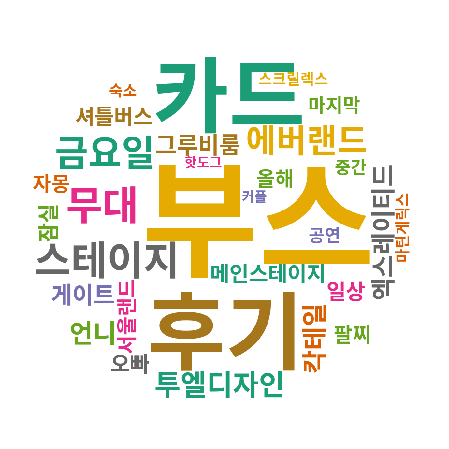

In [538]:
from wordcloud import WordCloud
from PIL import Image
import requests
import matplotlib.pyplot as plt

font_path = 'data/NotoSansCJKkr-Bold.otf'
url = 'https://banner2.cleanpng.com/20180328/soe/kisspng-circle-blue-shape-ball-clip-art-blue-5abb7206ab0a24.8045066715222338627006.jpg'

mask = np.array(Image.open(requests.get(url, stream=True).raw))

%matplotlib inline
wc = WordCloud(font_path = font_path,
               min_font_size = .5,
               colormap = 'Dark2',
               background_color='white', 
               width=800,
               height=800,
               mask = mask)

cloud = wc.generate_from_frequencies(word_dict)
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)